# Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots 

In [2]:
df = pd.read_csv(r'..\data\rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal','Density']

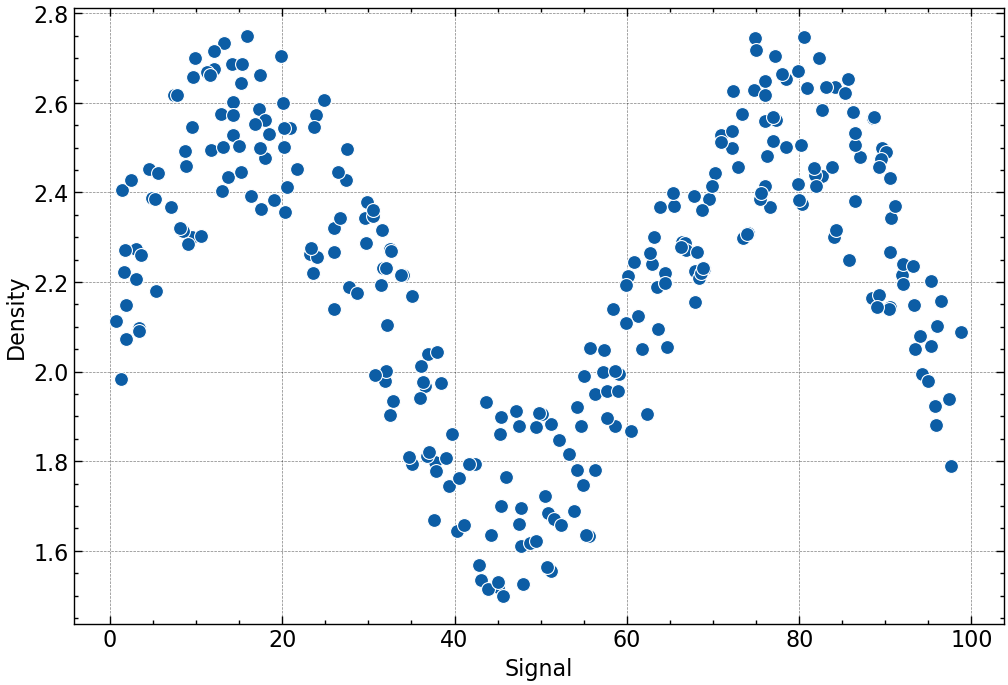

In [5]:
plt.style.use(['science','notebook','grid'])
plt.figure(figsize=(12,8))
sns.scatterplot(x='Signal', y='Density', data=df, s= 100);

## Splitting the data

In [6]:
X = df['Signal'].values.reshape(-1, 1) # karena kita hanya mempunyai satu fitur, kita perlu membentuk ulang nilainya => beralih ke array numpy => membentuknya kembali
y = df['Density']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state = 101)

## 1. Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr_model = LinearRegression()

In [11]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [12]:
lr_preds = lr_model.predict(X_test)

## Model Evaluations

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [15]:
mean_squared_error(y_test, lr_preds)

0.0660516726514864

In [16]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [17]:
# check the mean value density
df['Density'].mean()

2.2250629493237963

In [18]:
100 * 0.211198973318633 /2.2250629493237963

9.491820147507154

So our model is off by abount 9.5% of the actual value based on MAE.

It seems like our model is performing not too bad. However, if we look closer to the value of predictions, the predicted values are very similar around (2... something). This indicates something is happening.

But, what does it looks like? We can make some predictions on new data to test out whether our assumption is correct or not.

----
----

Jadi model kami meleset sekitar 9,5% dari nilai sebenarnya berdasarkan MAE.

Sepertinya performa model kami tidak terlalu buruk. Namun jika kita melihat lebih dekat pada nilai prediksi, nilai prediksi tersebut sangat mirip (2...sekian). Ini menandakan sesuatu sedang terjadi.

Tapi, seperti apa bentuknya? Kita dapat membuat beberapa prediksi terhadap data baru untuk menguji apakah asumsi kita benar atau tidak.

## Prediction new data and Visualization

In [20]:
signal_range = np.arange(0, 100)

In [21]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

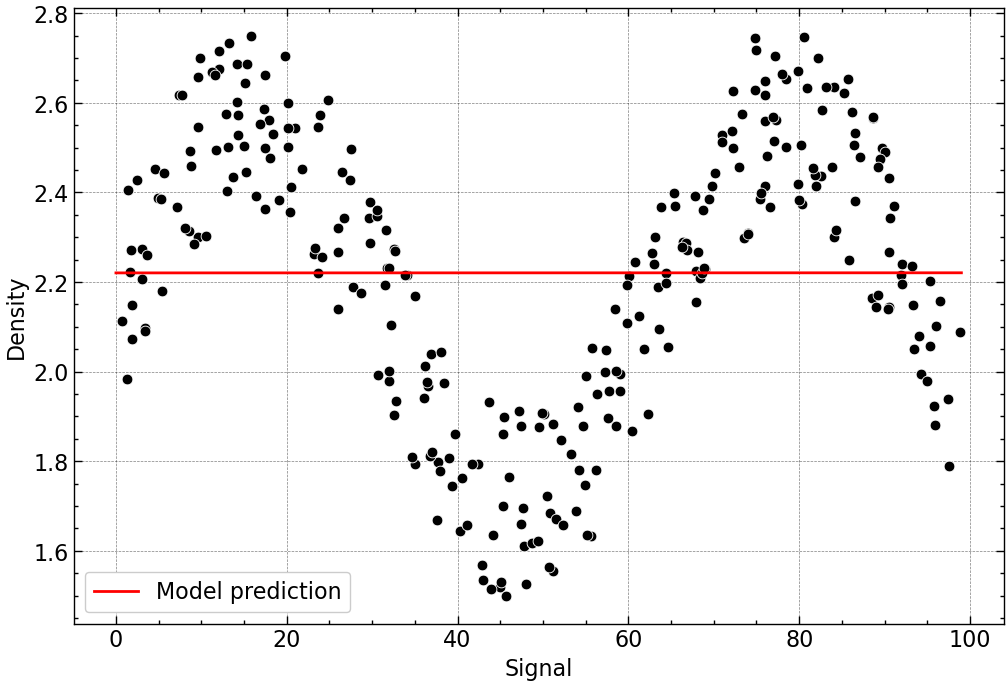

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Signal', y='Density', data=df, s= 60, color='k')
plt.plot(signal_range, signal_preds, color='r', label='Model prediction')
plt.legend();

## 2. Polynomial Regression
Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x

## Function to Help Run Models

In [37]:
from sklearn.linear_model import LinearRegression
model  = LinearRegression()

In [57]:
def run_model(model, X_train, X_test, y_train, y_test):
    # train model
    model.fit(X_train, y_train)
    
    # get metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'RMSE : {rmse}')
    
    # plot result
    signal_range = np.arange(0, 100)
    signal_pred = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize=(12, 8), dpi=150)
    sns.scatterplot(x='Signal', y='Density',data=df,  s= 60, color='k')
    plt.plot(signal_range, signal_pred)

RMSE : 0.2570051996584629


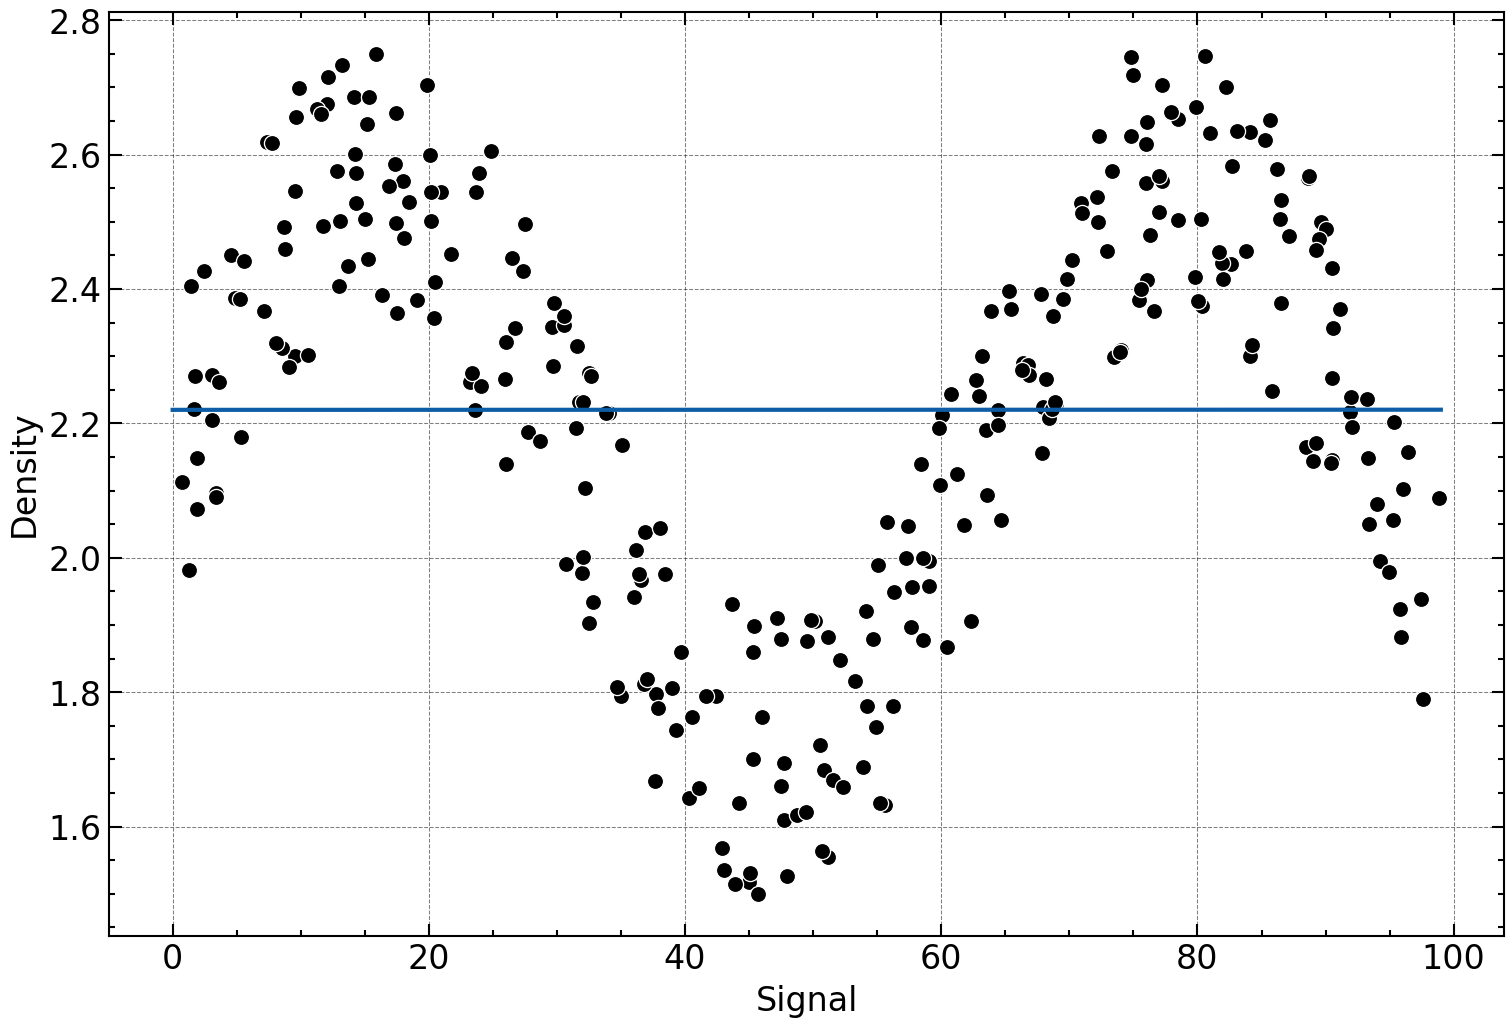

In [58]:
run_model(model, X_train, X_test, y_train, y_test);

## Pipeline for Poly Orders

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## `2 Degree` Polynomial

In [62]:
pipe = make_pipeline(PolynomialFeatures(2), LinearRegression())

RMSE : 0.2817309563725558


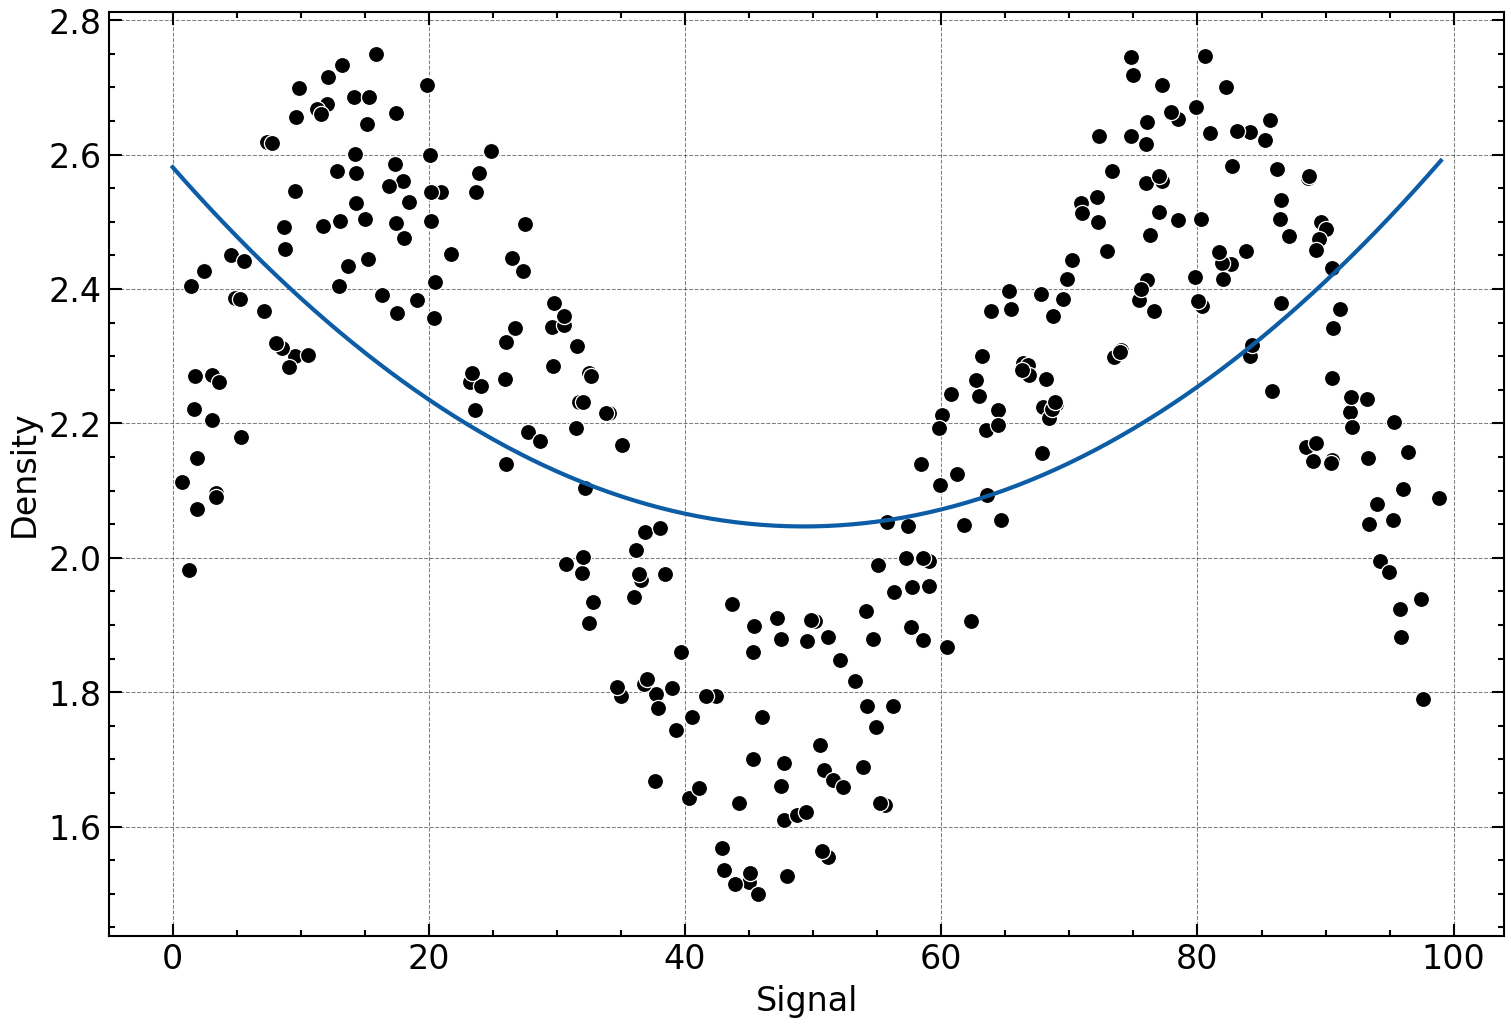

In [63]:
run_model(pipe, X_train, X_test, y_train, y_test);

## `3 degree` Polynomial

In [65]:
pipe = make_pipeline(PolynomialFeatures(degree= 3), LinearRegression())

RMSE : 0.2879748127918903


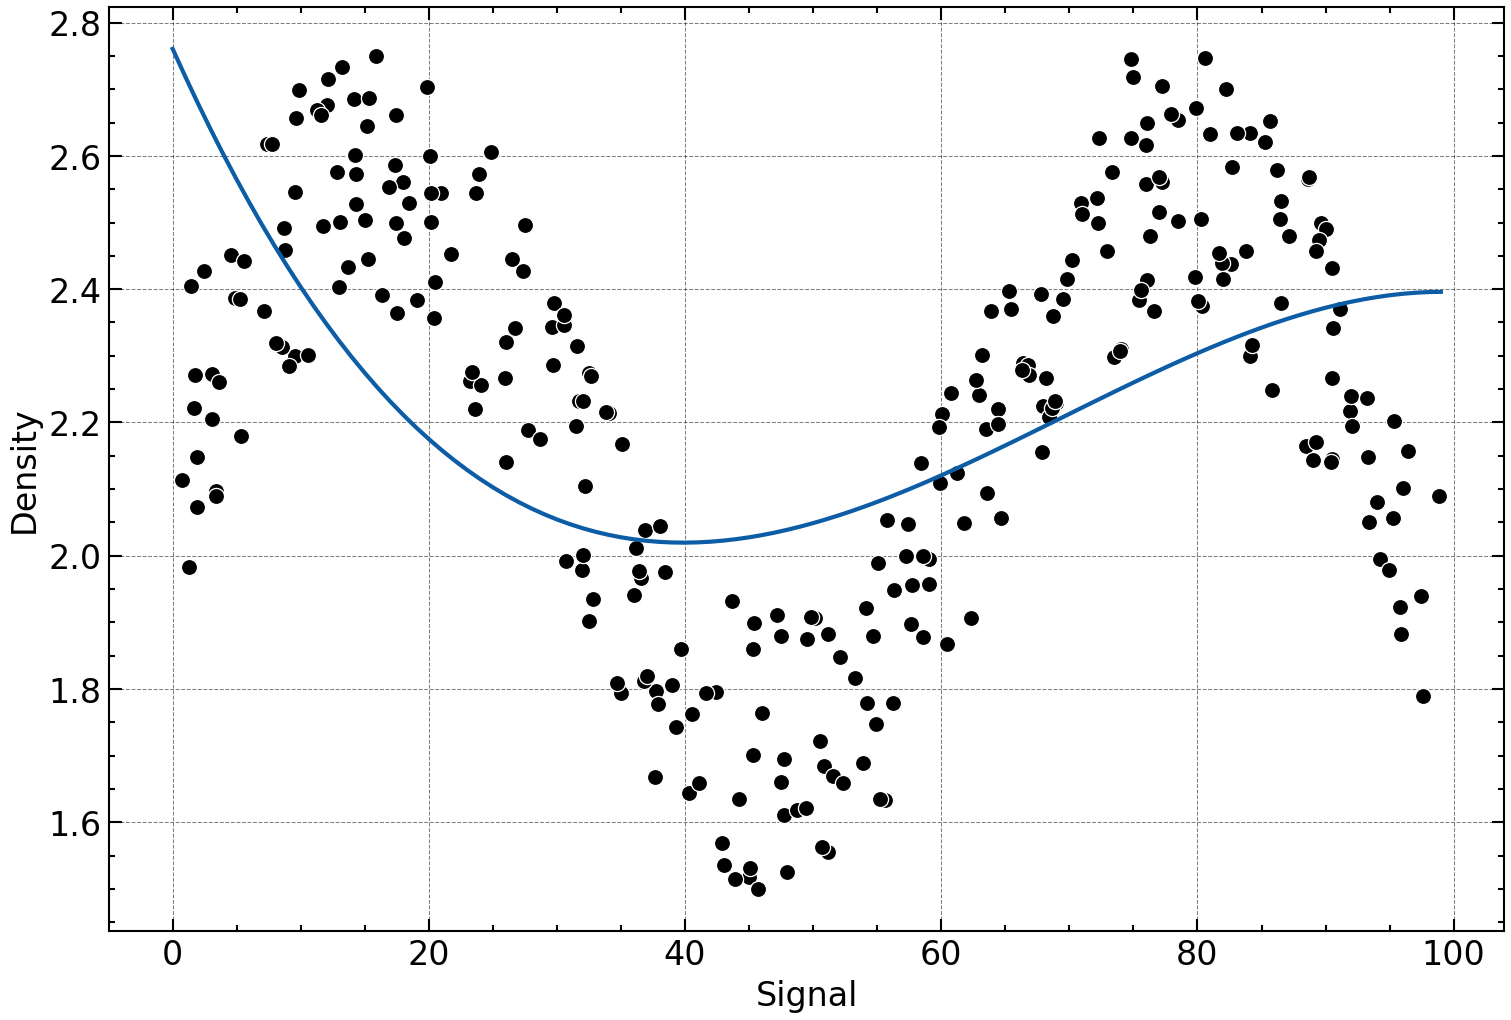

In [67]:
run_model(pipe,X_train, X_test, y_train,y_test);

## `6 degree` Polynomial

In [68]:
pipe = make_pipeline(PolynomialFeatures(degree= 6), LinearRegression())

RMSE : 0.1380752521530322


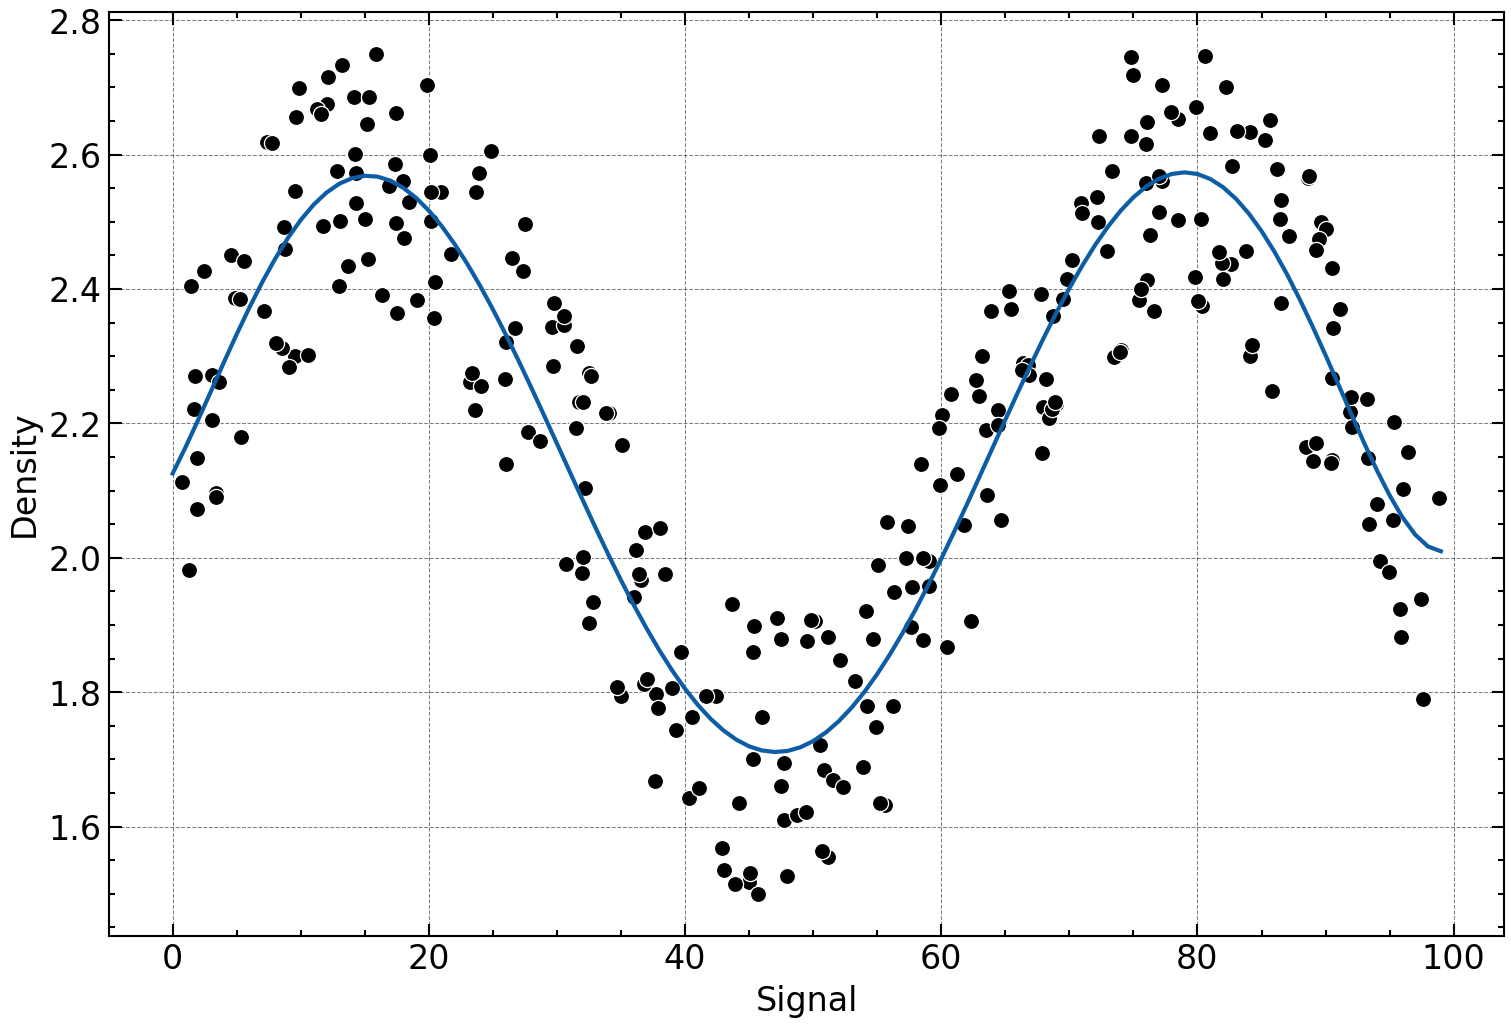

In [69]:
run_model(pipe,X_train, X_test, y_train,y_test);

## `10 degree` Polynomial

In [72]:
pipe = make_pipeline(PolynomialFeatures(degree= 10), LinearRegression())

RMSE : 0.14081666978312882


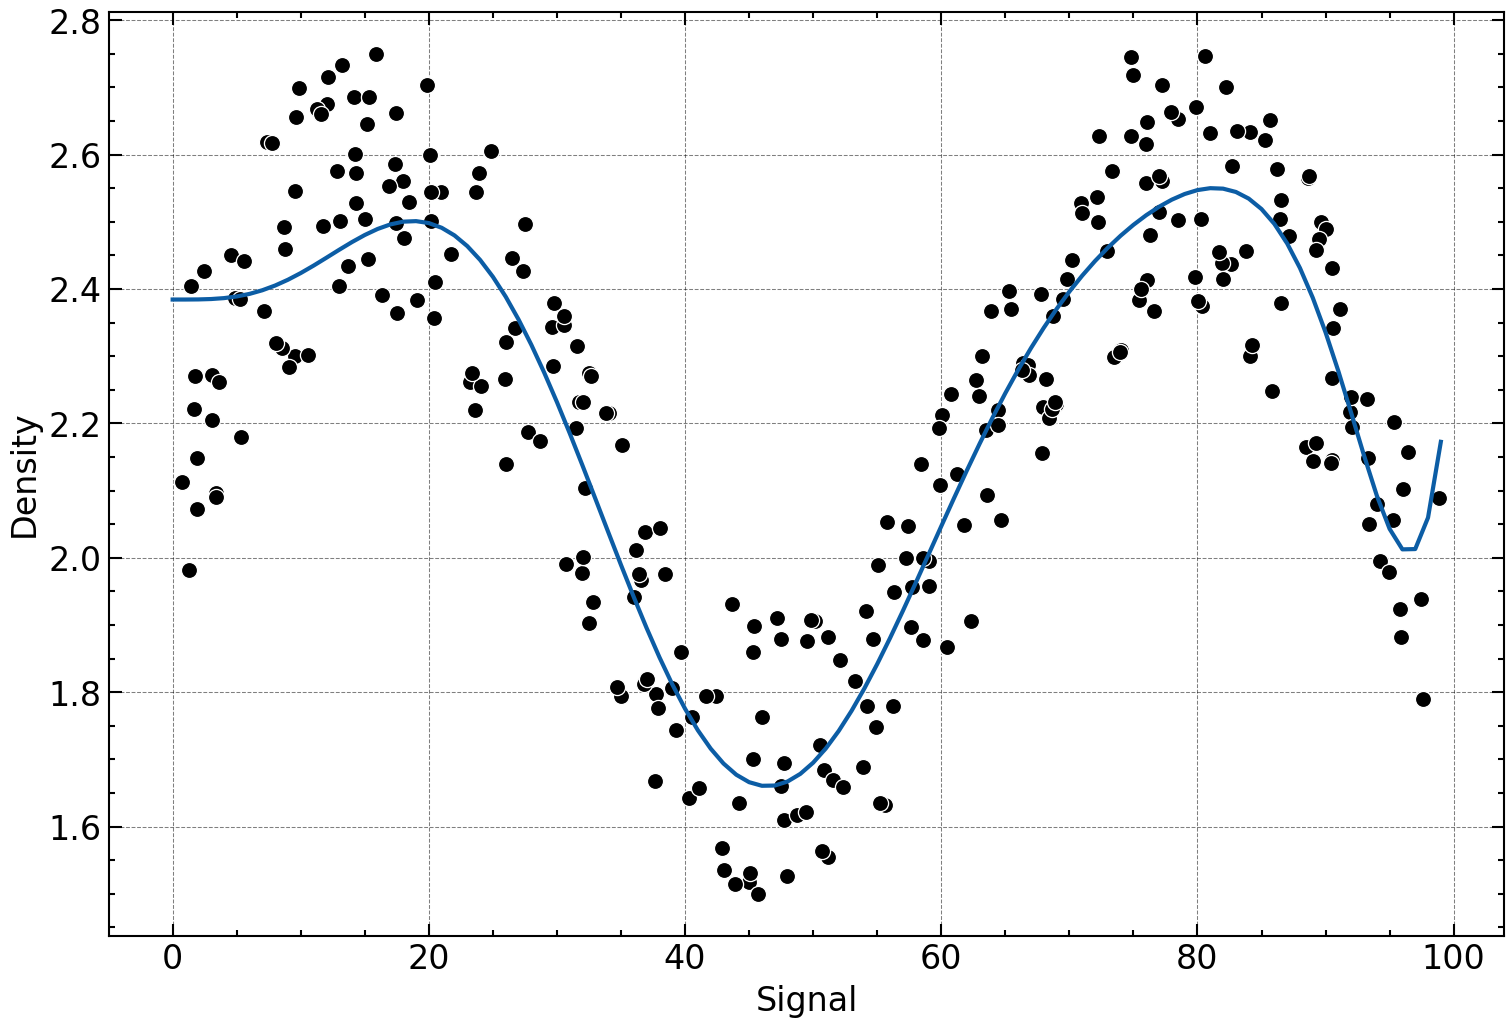

In [73]:
run_model(pipe,X_train, X_test, y_train,y_test);

## 3. KNN Regression

In [75]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


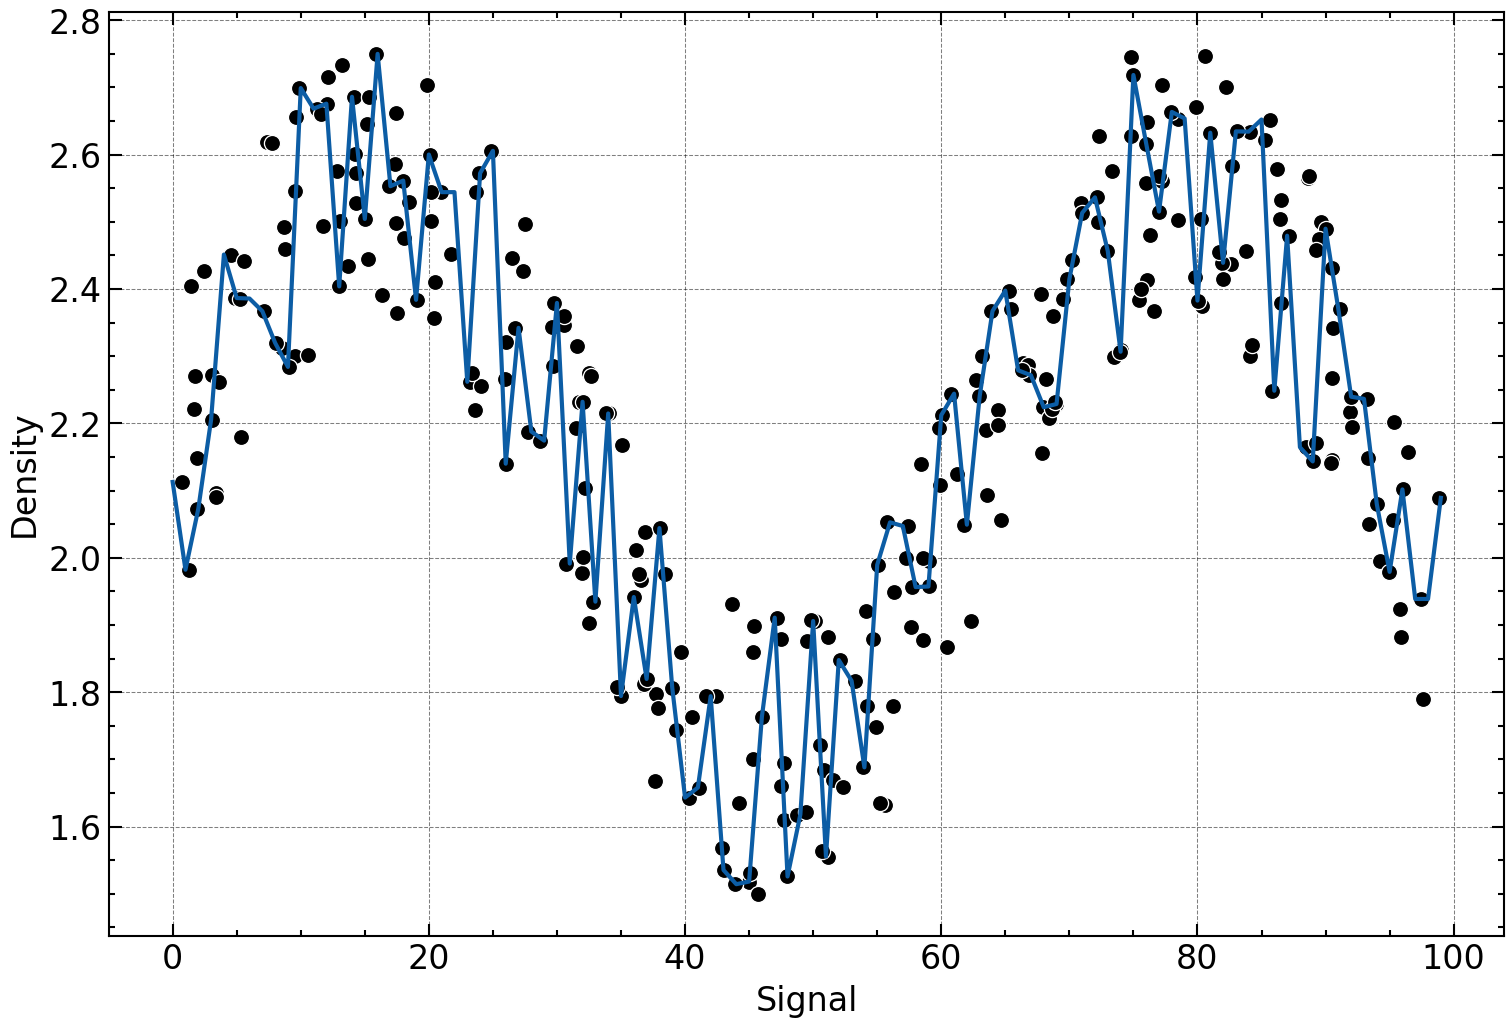

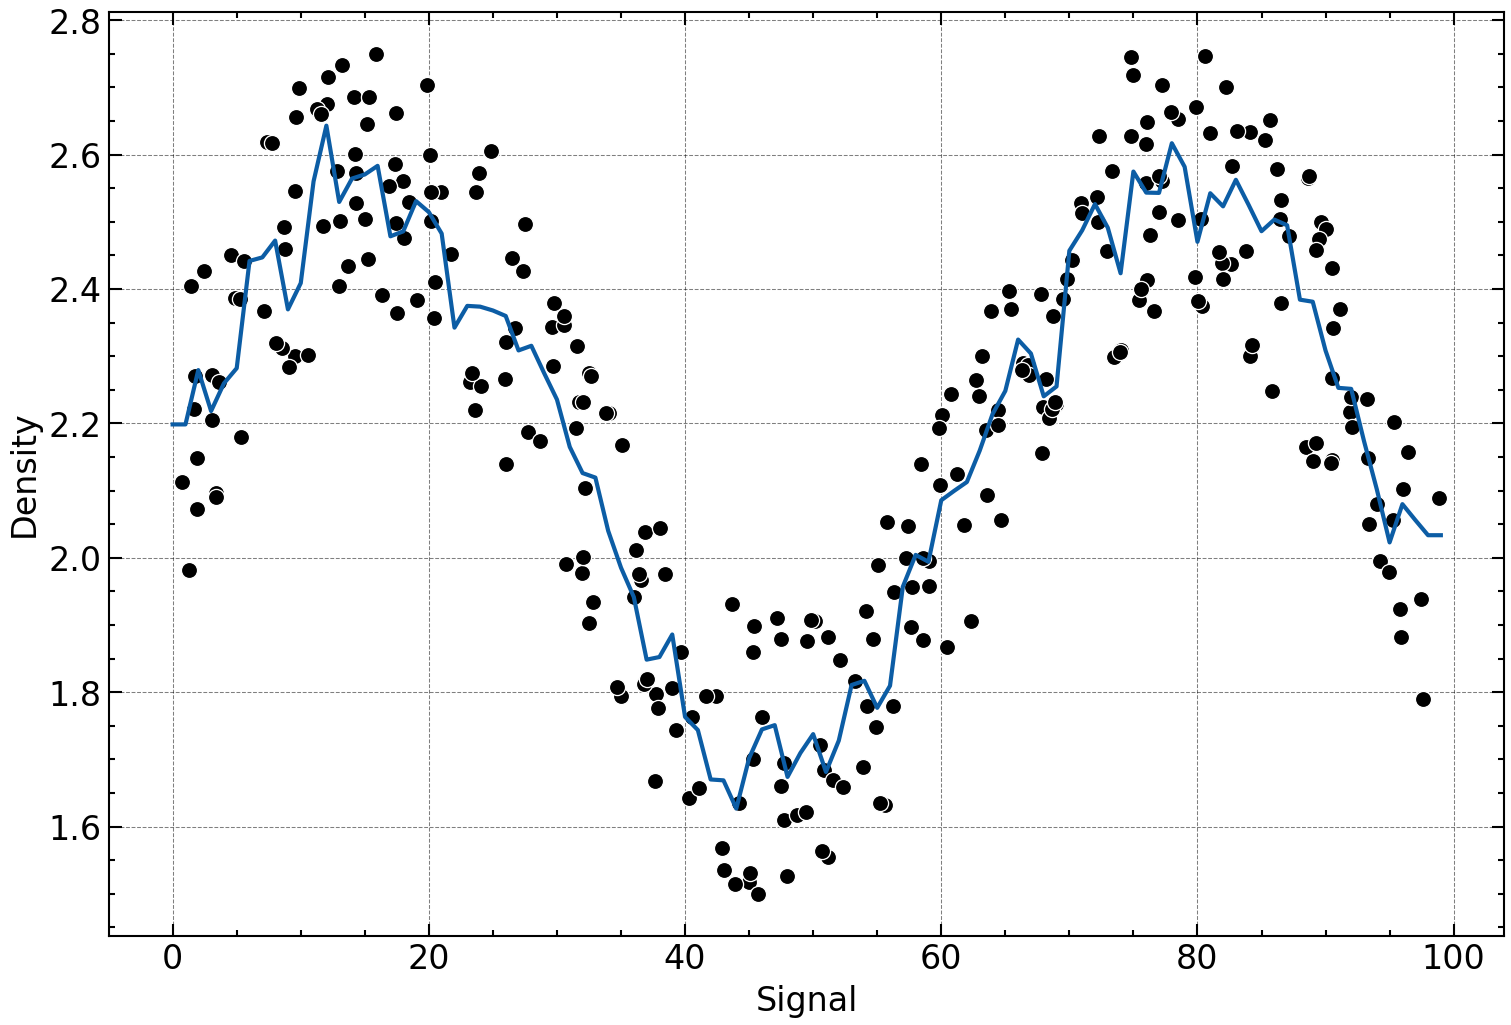

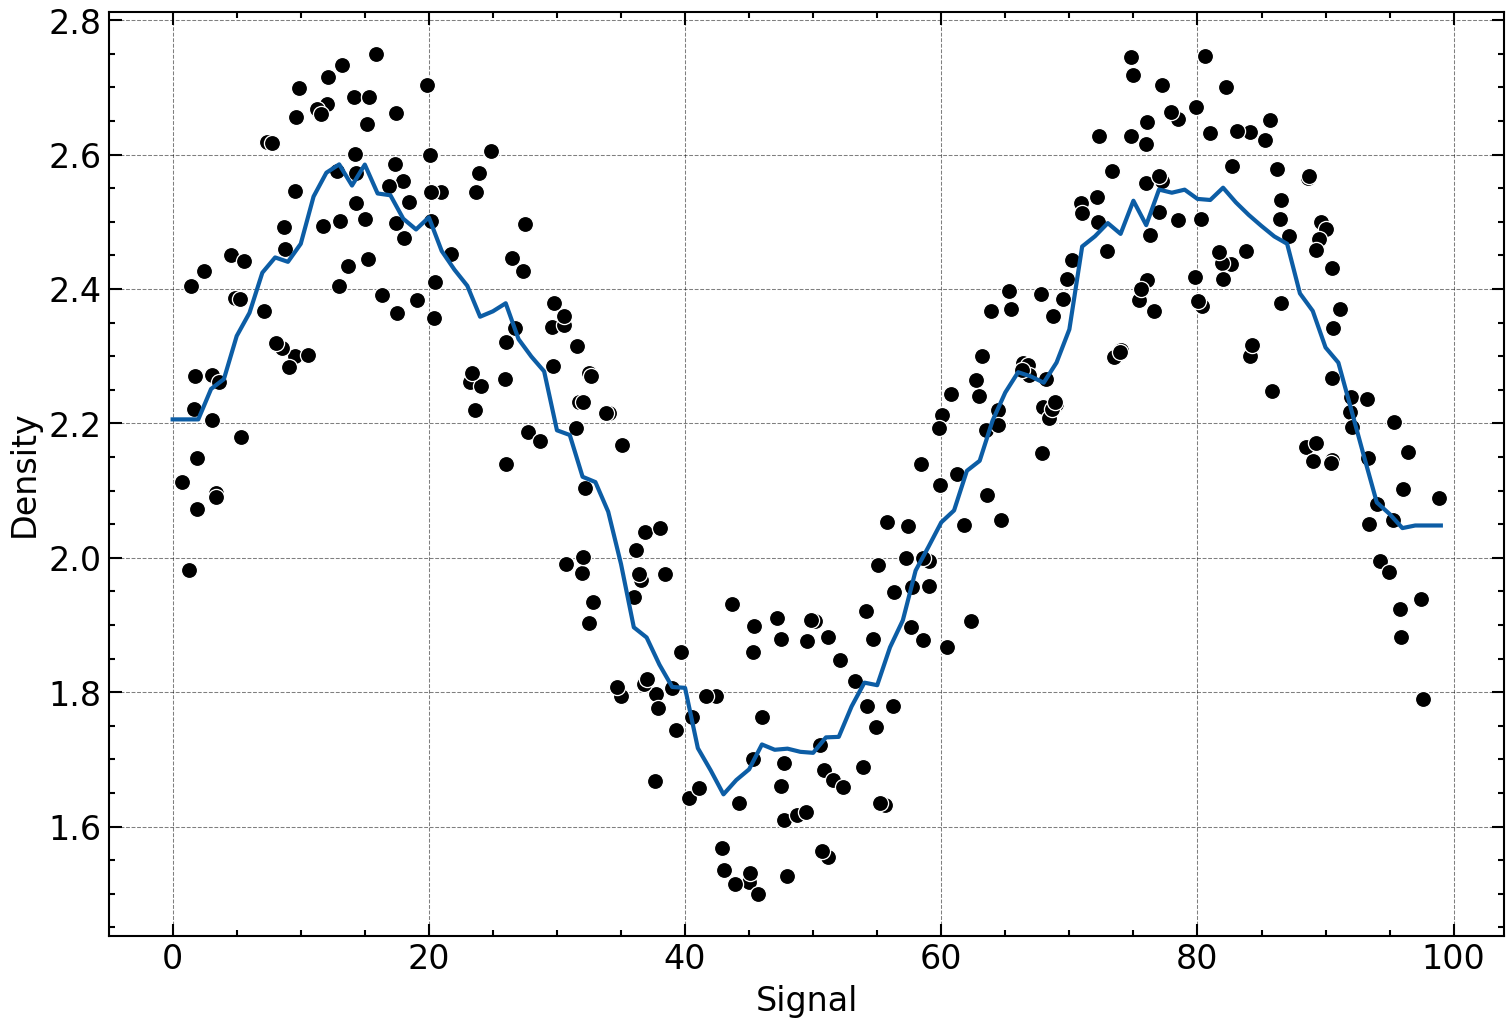

In [77]:
pred = {}
k_value = [1,5,10]
for n in k_value:
    
    model = KNeighborsRegressor(n_neighbors = n)
    run_model(model, X_train, X_test, y_train, y_test);

## 4. Decison Tree Regression

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
model = DecisionTreeRegressor()

RMSE : 0.1523487028635337


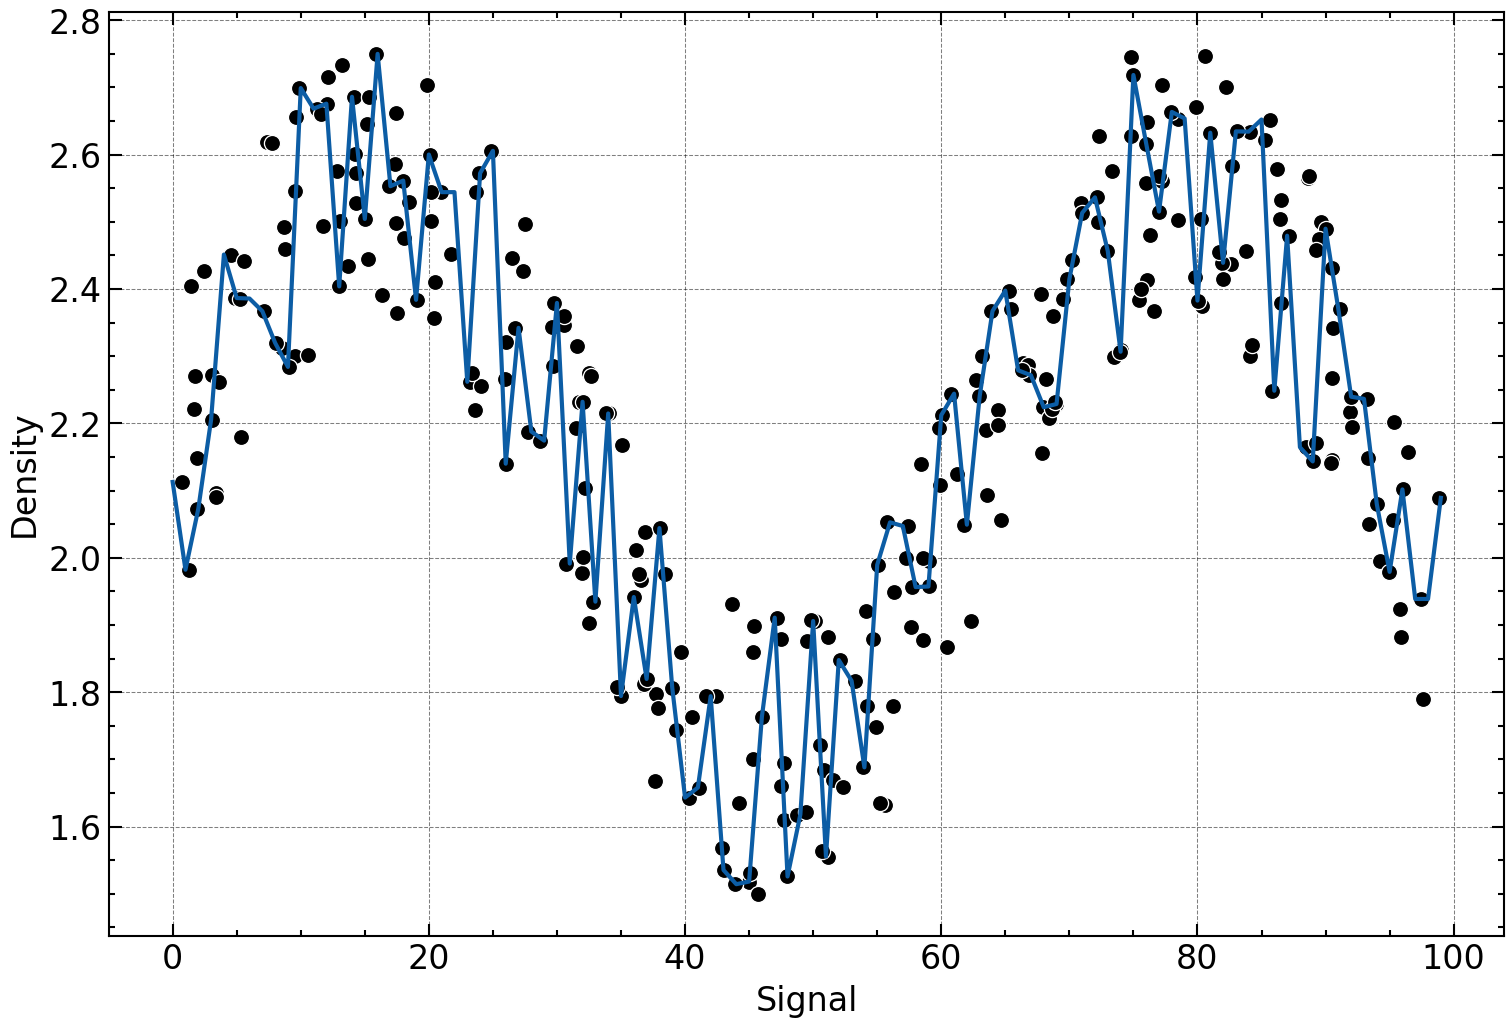

In [81]:
run_model(model, X_train,X_test, y_train, y_test);

## 5. Support Vector Regression

In [82]:
from sklearn.svm import SVR

In [85]:
from sklearn.model_selection import GridSearchCV

In [87]:
svr = SVR()

param_grid = {'C' : [0.01, 0.1, 0.5, 1,5,10,100,1000], 
              'gamma' :['auto','scale']}

In [88]:
grid = GridSearchCV(svr, param_grid)

RMSE : 0.12646999302046696


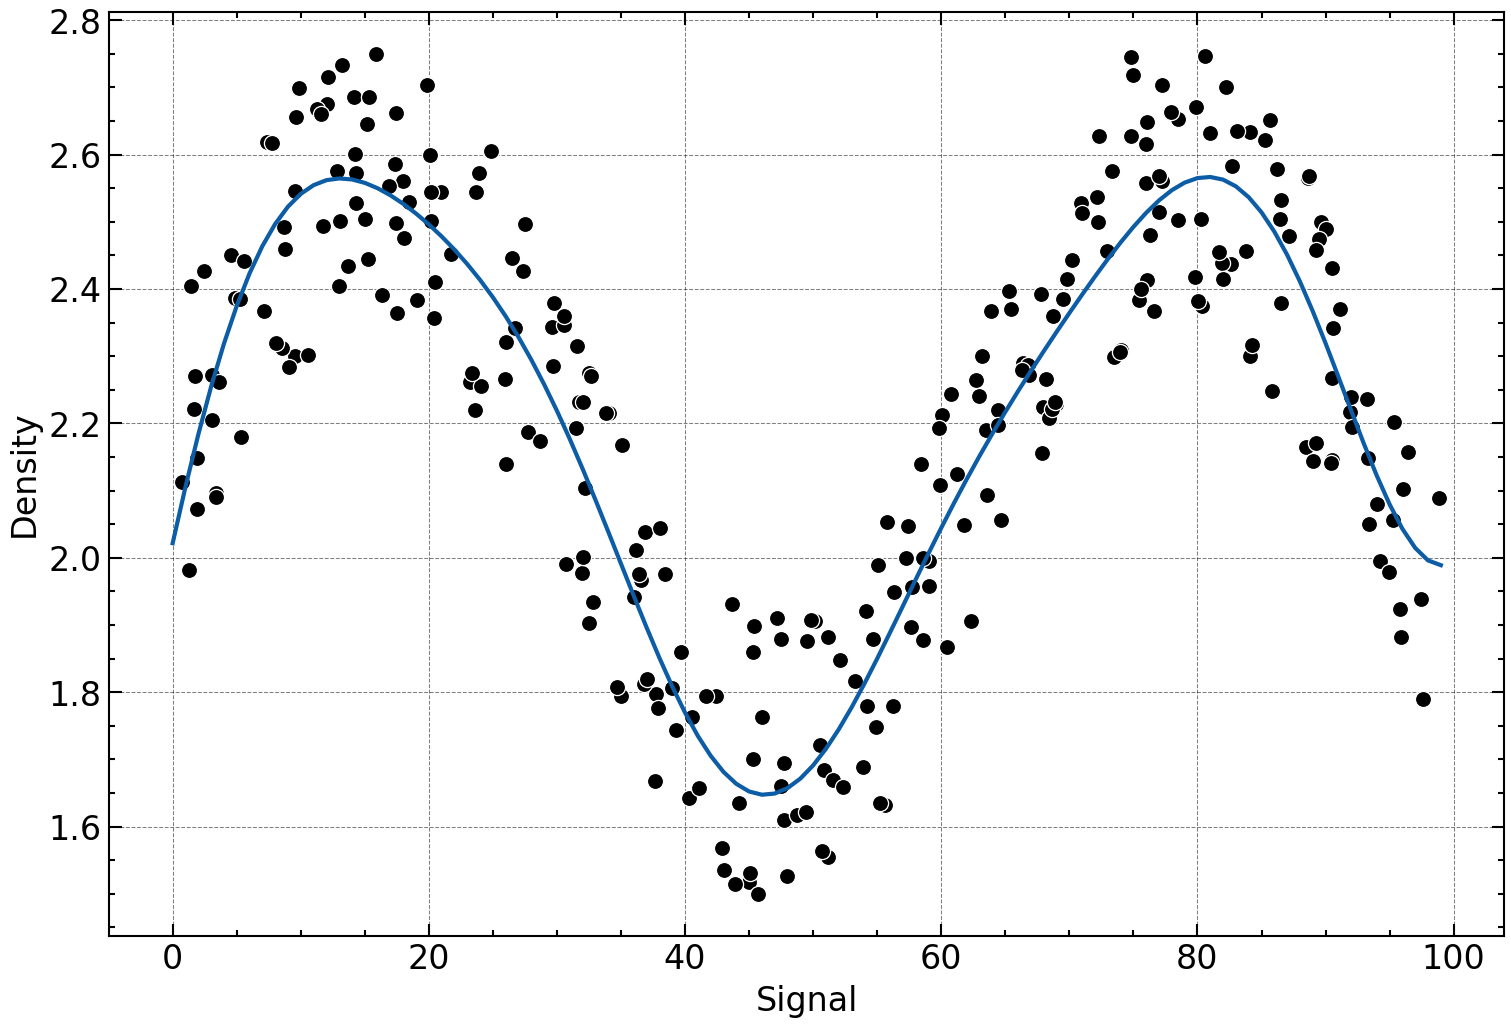

In [89]:
run_model(grid, X_train,X_test, y_train, y_test);

In [90]:
grid.best_estimator_

SVR(C=1000)

## Random Forest Regression

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimato

RMSE : 0.12973680940151597
RMSE : 0.1334905100832026
RMSE : 0.13196216717780068


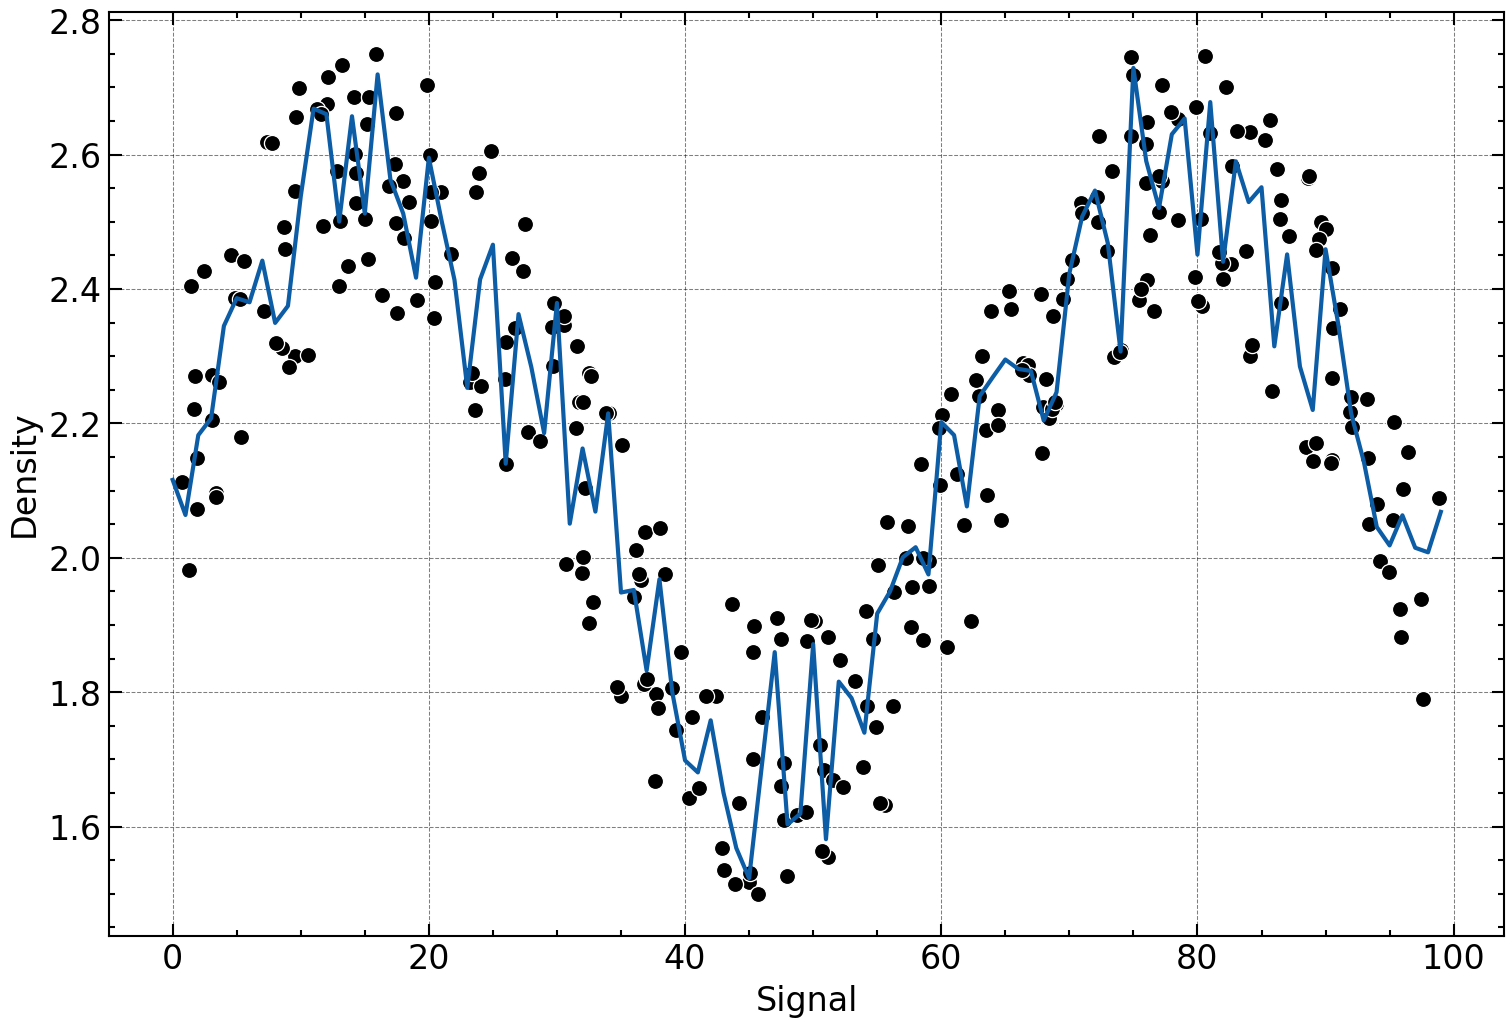

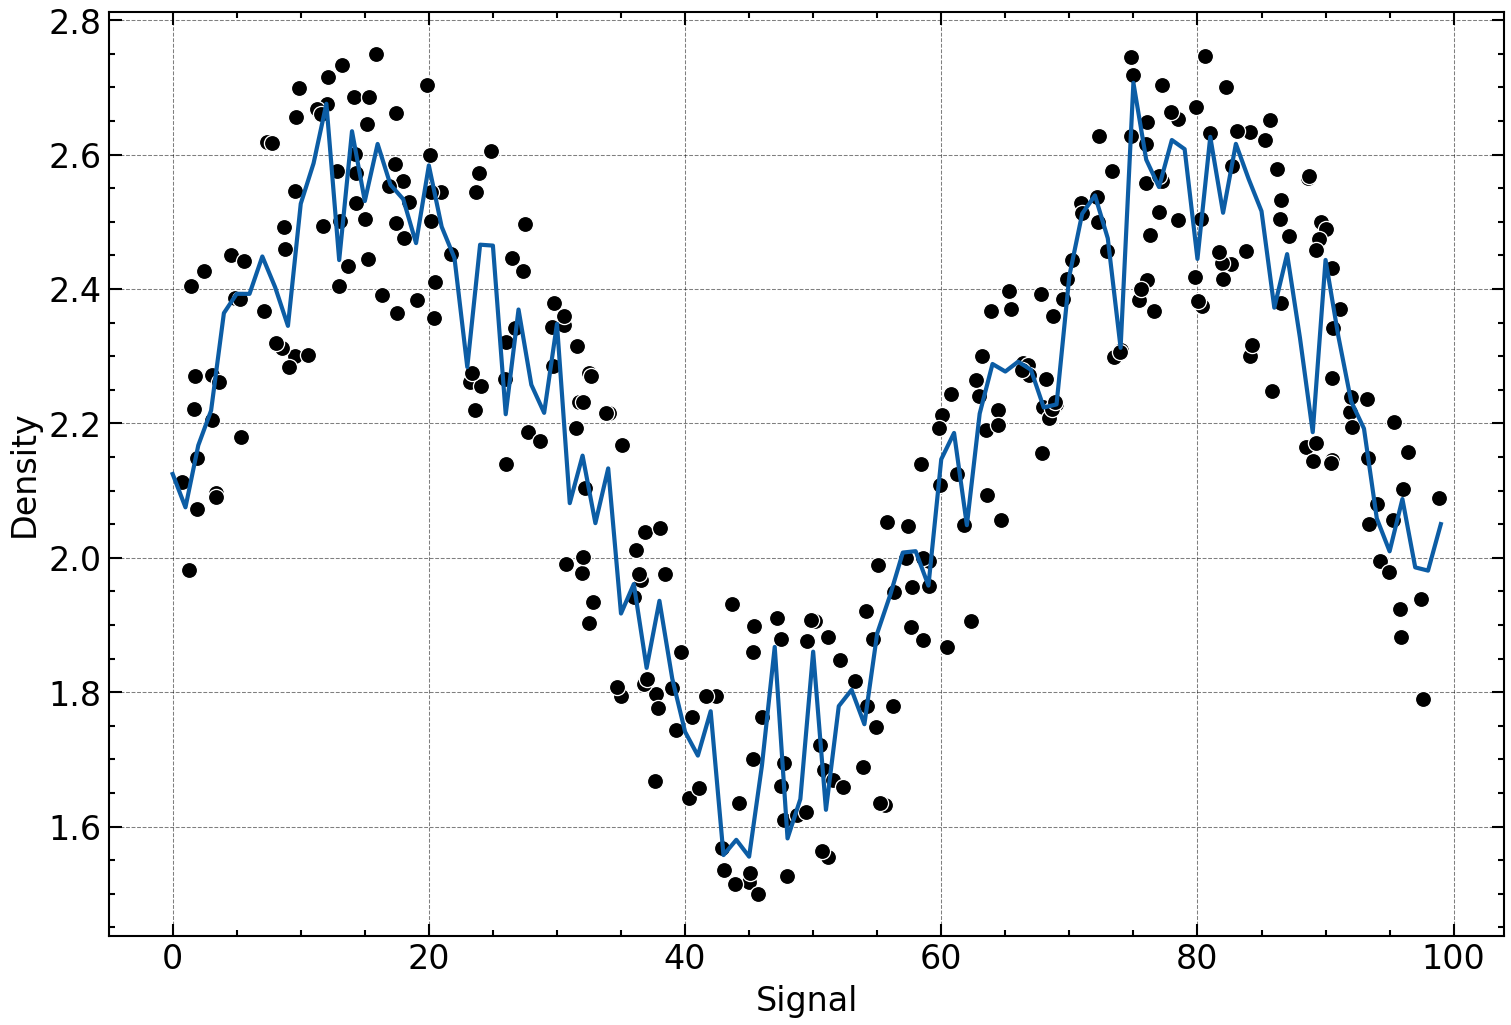

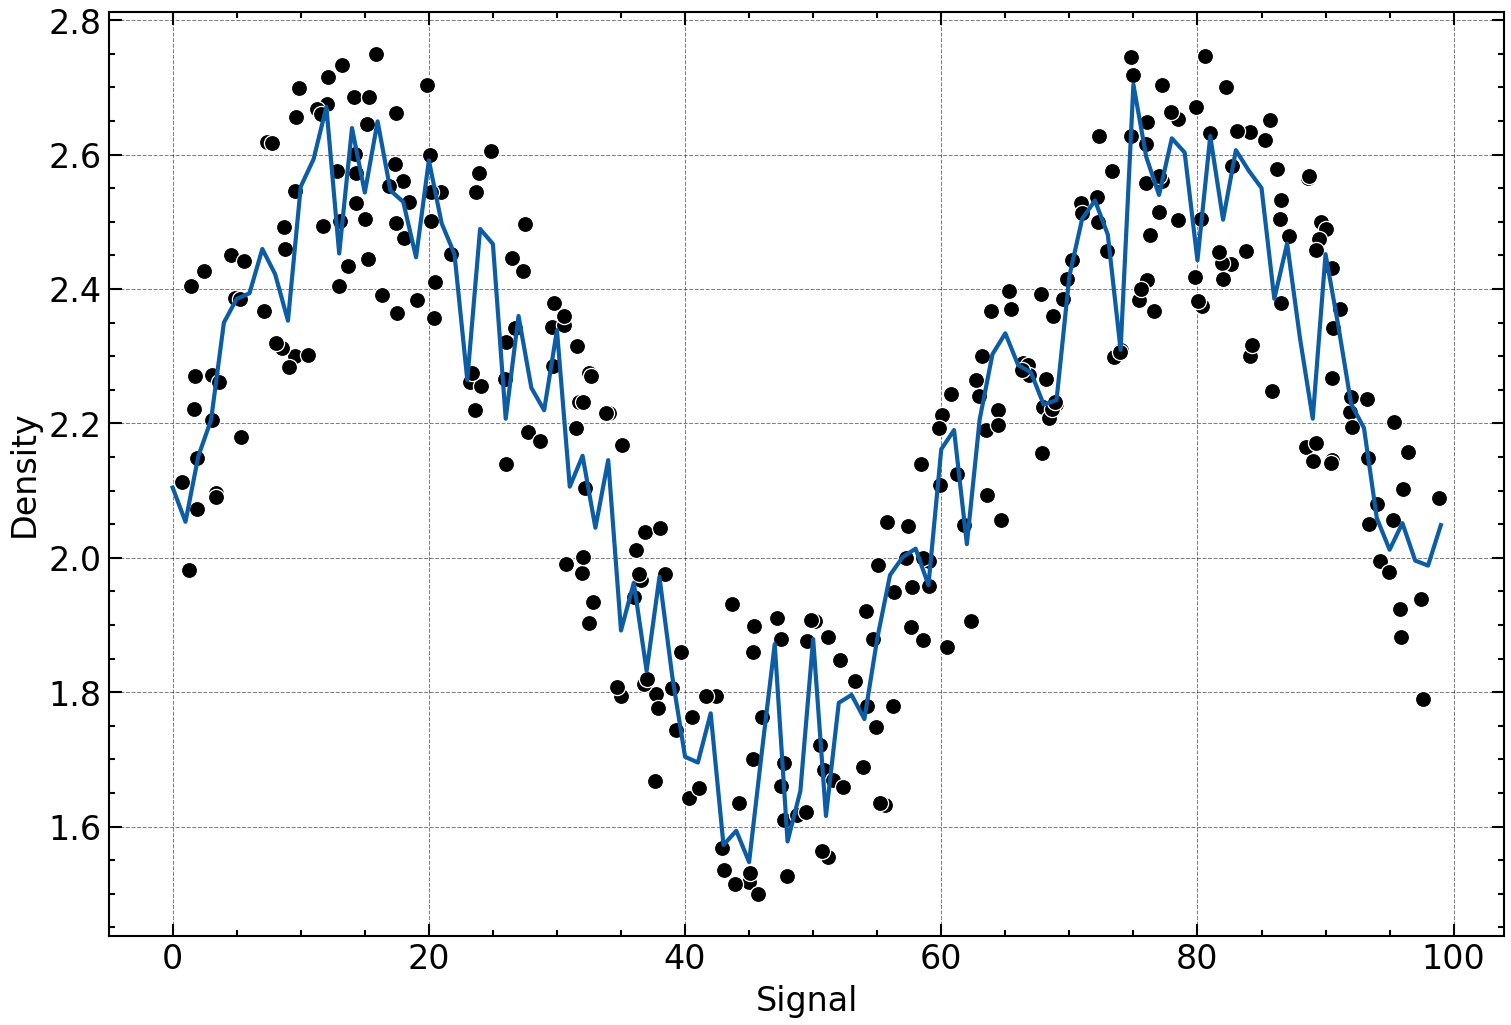

In [96]:
tree = [10, 50, 100]

for n in tree:
    
    model = RandomForestRegressor(n_estimators = n)
    run_model(model, X_train, X_test, y_train, y_test);

## Gradient Boosting
We will cover this in more detail in next section.

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE : 0.13294148649584667


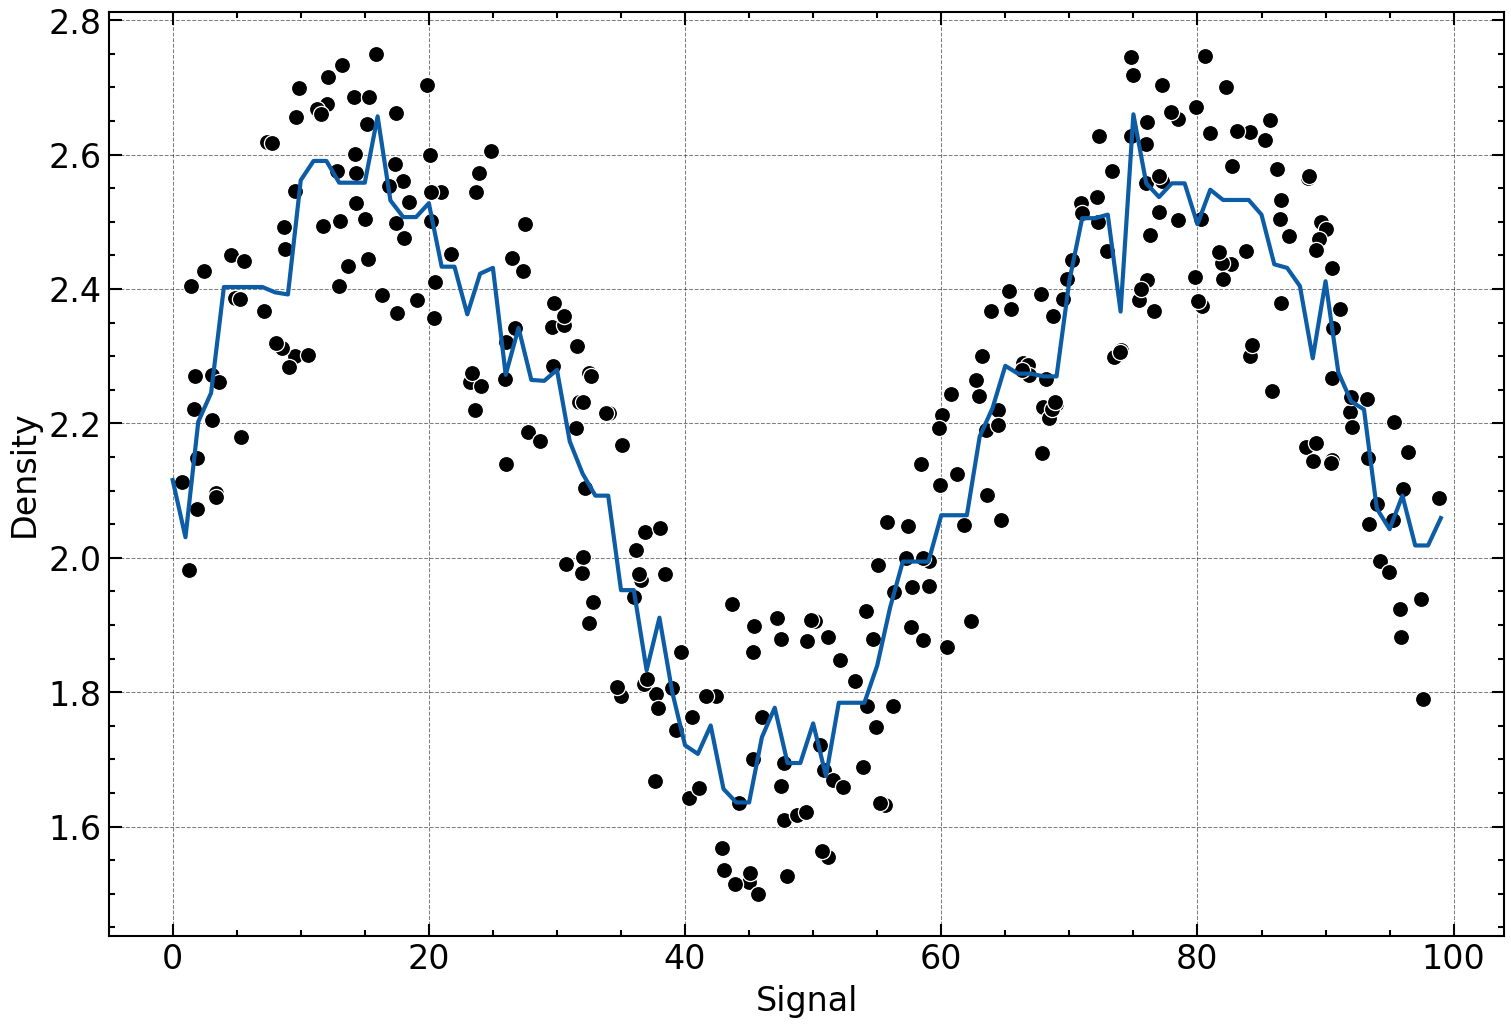

In [101]:
model =  GradientBoostingRegressor()
run_model(model, X_train, X_test, y_train, y_test);

## AdaBoostReression

In [102]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13538514974704682


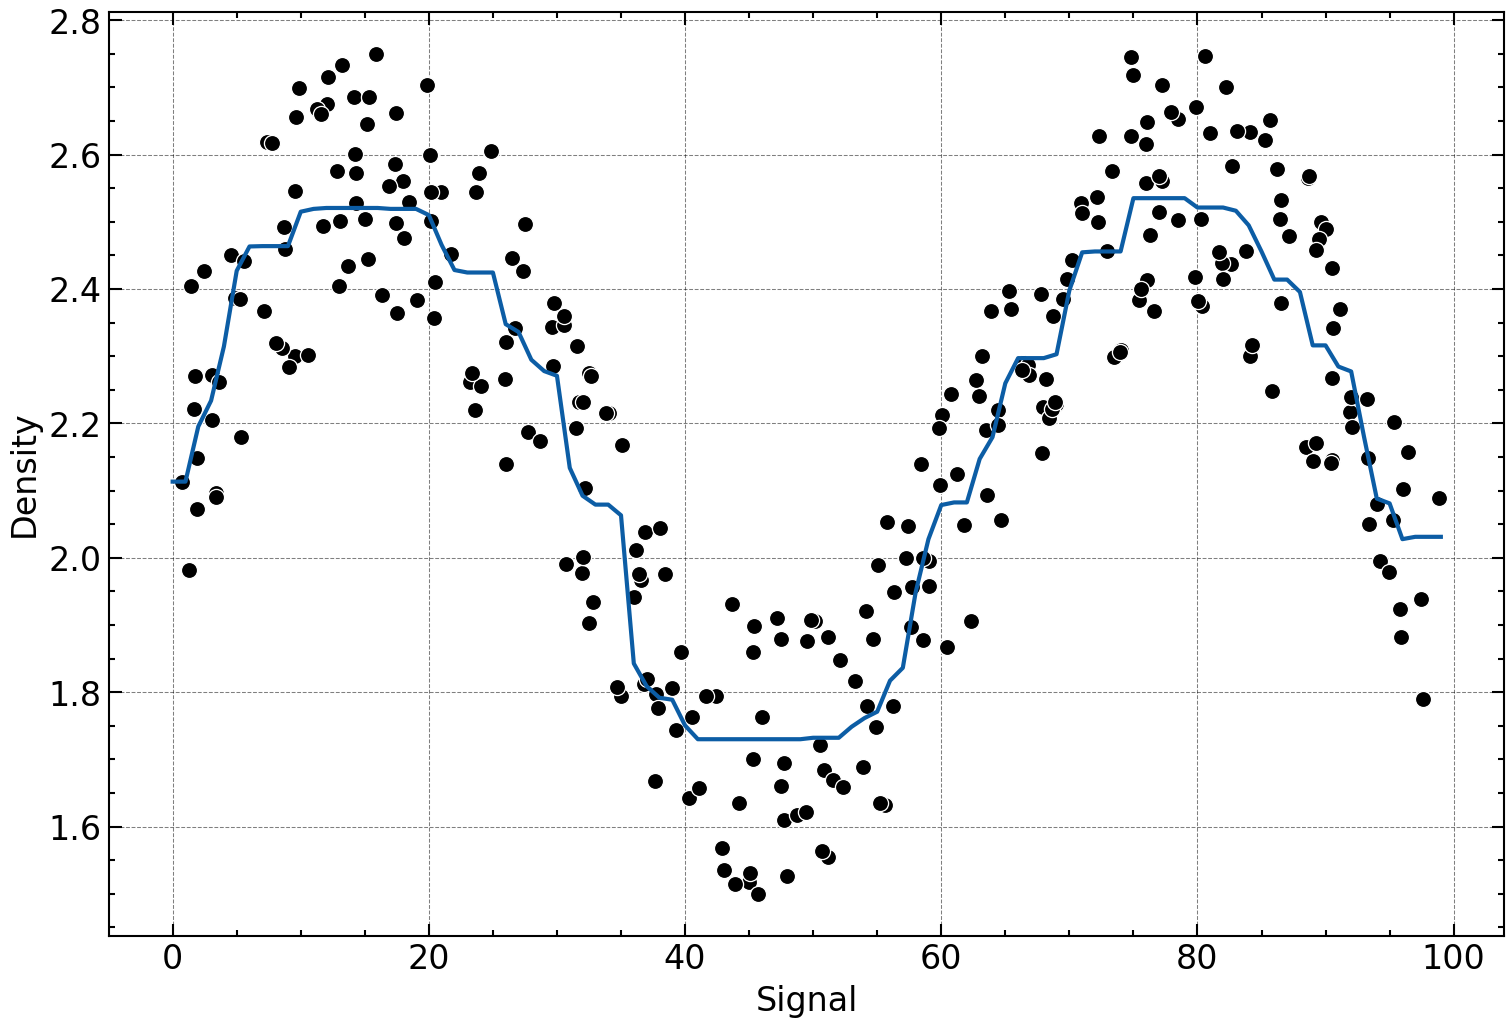

In [104]:
model = AdaBoostRegressor()
run_model(model, X_train, X_test, y_train, y_test);

## XGBRegression

In [115]:
from xgboost import XGBRegressor

RMSE : 0.16307113820634242


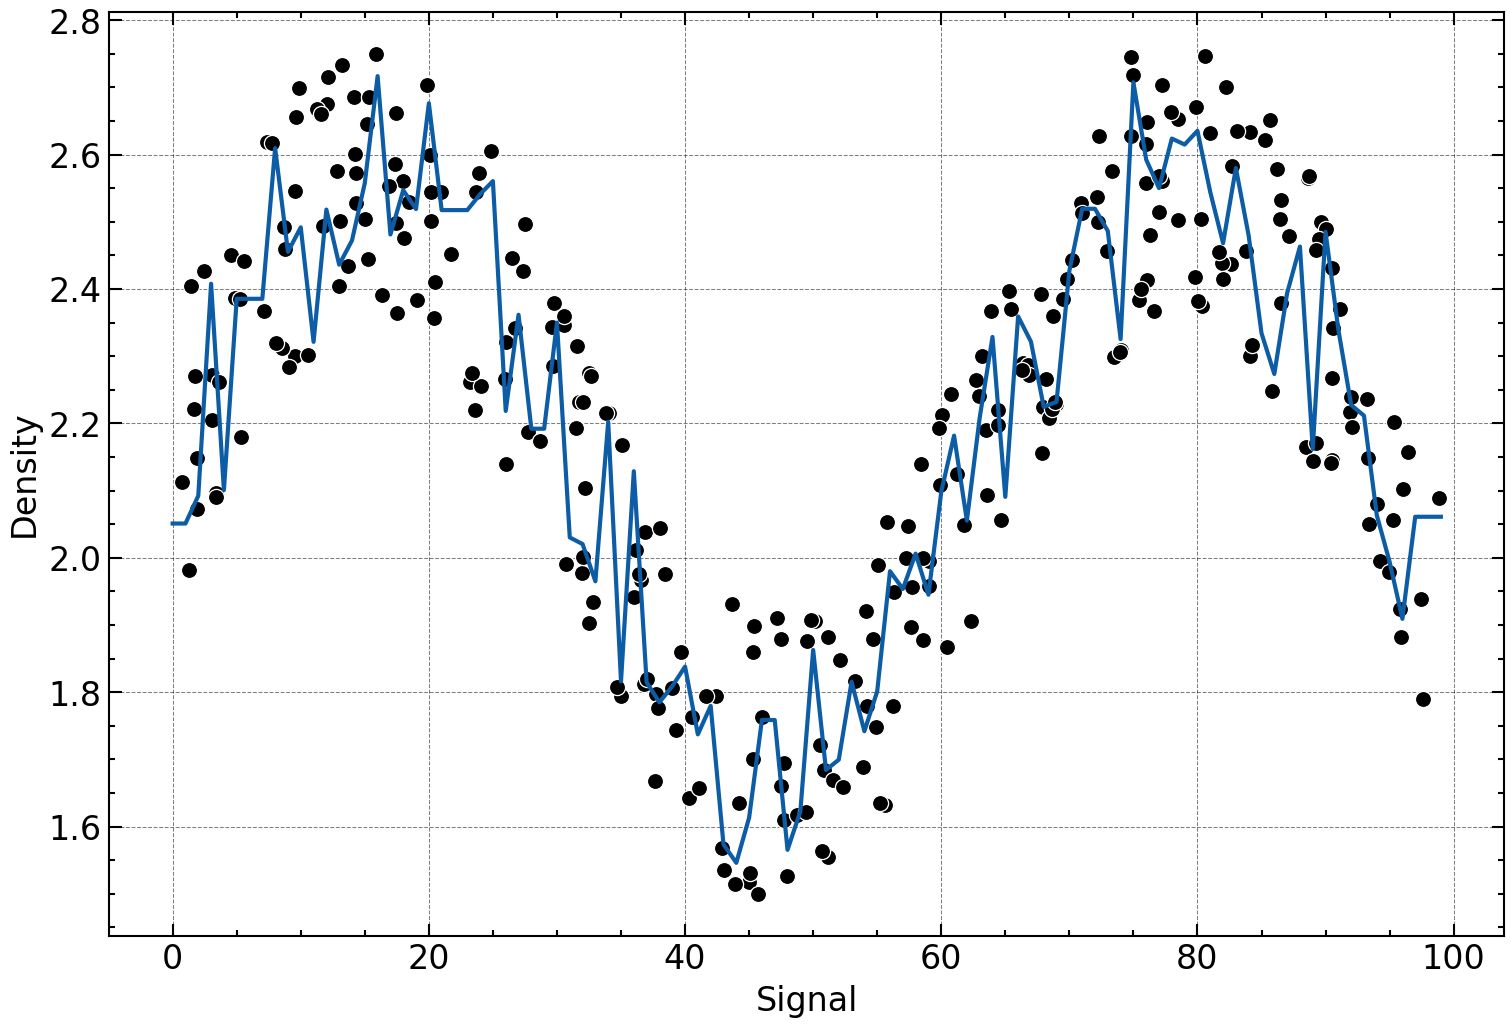

In [116]:
model = XGBRegressor()
run_model(model,X_train,X_test, y_train, y_test);